# Delivery Time Prediction

i) Data Profiling

ii) Data Cleaning

iii) Missing-Value Treatment

iv) Exploratory Data Analysis

v) Feature Engineering = encoding , binning, combine correlated feat

vi) Data Preprocessing = split , scale , encode , pca dim reduce

vii) Modeling


In [363]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import timeit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.exceptions import DataConversionWarning


warnings.filterwarnings("default", category=DataConversionWarning)

In [364]:
df = pd.read_csv("filEs/train.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


# i) Data Profiling


In [365]:
df.shape

(45593, 20)

In [366]:
df.sample(30)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
35164,0x1b77,COIMBRES06DEL01,NaN,NaN,11.021278,76.995017,11.061278,77.035017,17-03-2022,13:50:00,13:55:00,conditions Sunny,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 42
6758,0xafe7,INDORES02DEL01,33,4.8,22.651847,75.881991,22.661847,75.891991,09-03-2022,09:20:00,09:30:00,conditions Sandstorms,Low,1,Buffet,scooter,0,No,Urban,(min) 23
21845,0x663d,SURRES18DEL03,23,4.9,21.149834,72.778666,21.209834,72.838666,03-04-2022,22:30:00,22:35:00,conditions Stormy,Low,2,Snack,scooter,0,No,Metropolitian,(min) 16
25880,0xa27c,SURRES14DEL03,31,4.8,21.157729,72.768726,21.217729,72.828726,11-03-2022,21:35:00,21:50:00,conditions Windy,Jam,2,Buffet,scooter,0,No,Metropolitian,(min) 29
22491,0x762f,COIMBRES19DEL03,37,4.8,11.022298,76.998349,11.112298,77.088349,04-04-2022,22:30:00,22:45:00,conditions Windy,Low,0,Buffet,motorcycle,1,No,Metropolitian,(min) 22
44953,0xda59,BHPRES16DEL02,29,4.8,23.264015,77.408236,23.284015,77.428236,13-02-2022,11:25:00,11:40:00,conditions Fog,High,2,Snack,scooter,0,No,Metropolitian,(min) 23
32576,0x76e0,VADRES18DEL01,24,4.9,0.000000,0.000000,0.010000,0.010000,13-03-2022,09:10:00,09:25:00,conditions Windy,Low,2,Meal,scooter,1,No,Metropolitian,(min) 14
6899,0xa3a1,JAPRES18DEL02,36,4.7,26.913987,75.752891,26.933987,75.772891,30-03-2022,09:25:00,09:30:00,conditions Cloudy,Low,2,Drinks,motorcycle,1,No,Metropolitian,(min) 17
28316,0x926e,CHENRES04DEL02,24,4.1,13.029780,80.208812,13.079780,80.258812,05-03-2022,22:20:00,22:30:00,conditions Sandstorms,Low,0,Buffet,motorcycle,1,No,Metropolitian,(min) 29
29156,0x3d05,BANGRES16DEL01,35,3.6,13.029198,77.570997,13.139198,77.680997,06-03-2022,19:20:00,19:35:00,conditions Stormy,Jam,2,Buffet,electric_scooter,0,No,Metropolitian,(min) 37


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [368]:
df.isna().sum().sum()

0

In [369]:
df.iloc[6478, 2]

'NaN '

In [370]:
(df == "NaN ").sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

#### Data are missing and in the form of object "NaN " , so requires treatment


In [371]:
(df == "NaN ").sum().sum()

8515

In [372]:
missing_df = df.replace(["NaN ", "conditions NaN"], np.NaN)
# "NaN " is in string form and weather contains conditions NaN

In [373]:
missing_df["Weatherconditions"] = missing_df.loc[:, "Weatherconditions"].str.replace(
    "conditions ", ""
)  # weather contains condition .....weather....

In [374]:
missing_df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [375]:
(missing_df == "NaN ").sum().sum()

0

In [376]:
missing_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [377]:
missing_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [378]:
missing_df.isna().sum().sum()

9131

In [379]:
missing_df.Weatherconditions.unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

<Axes: >

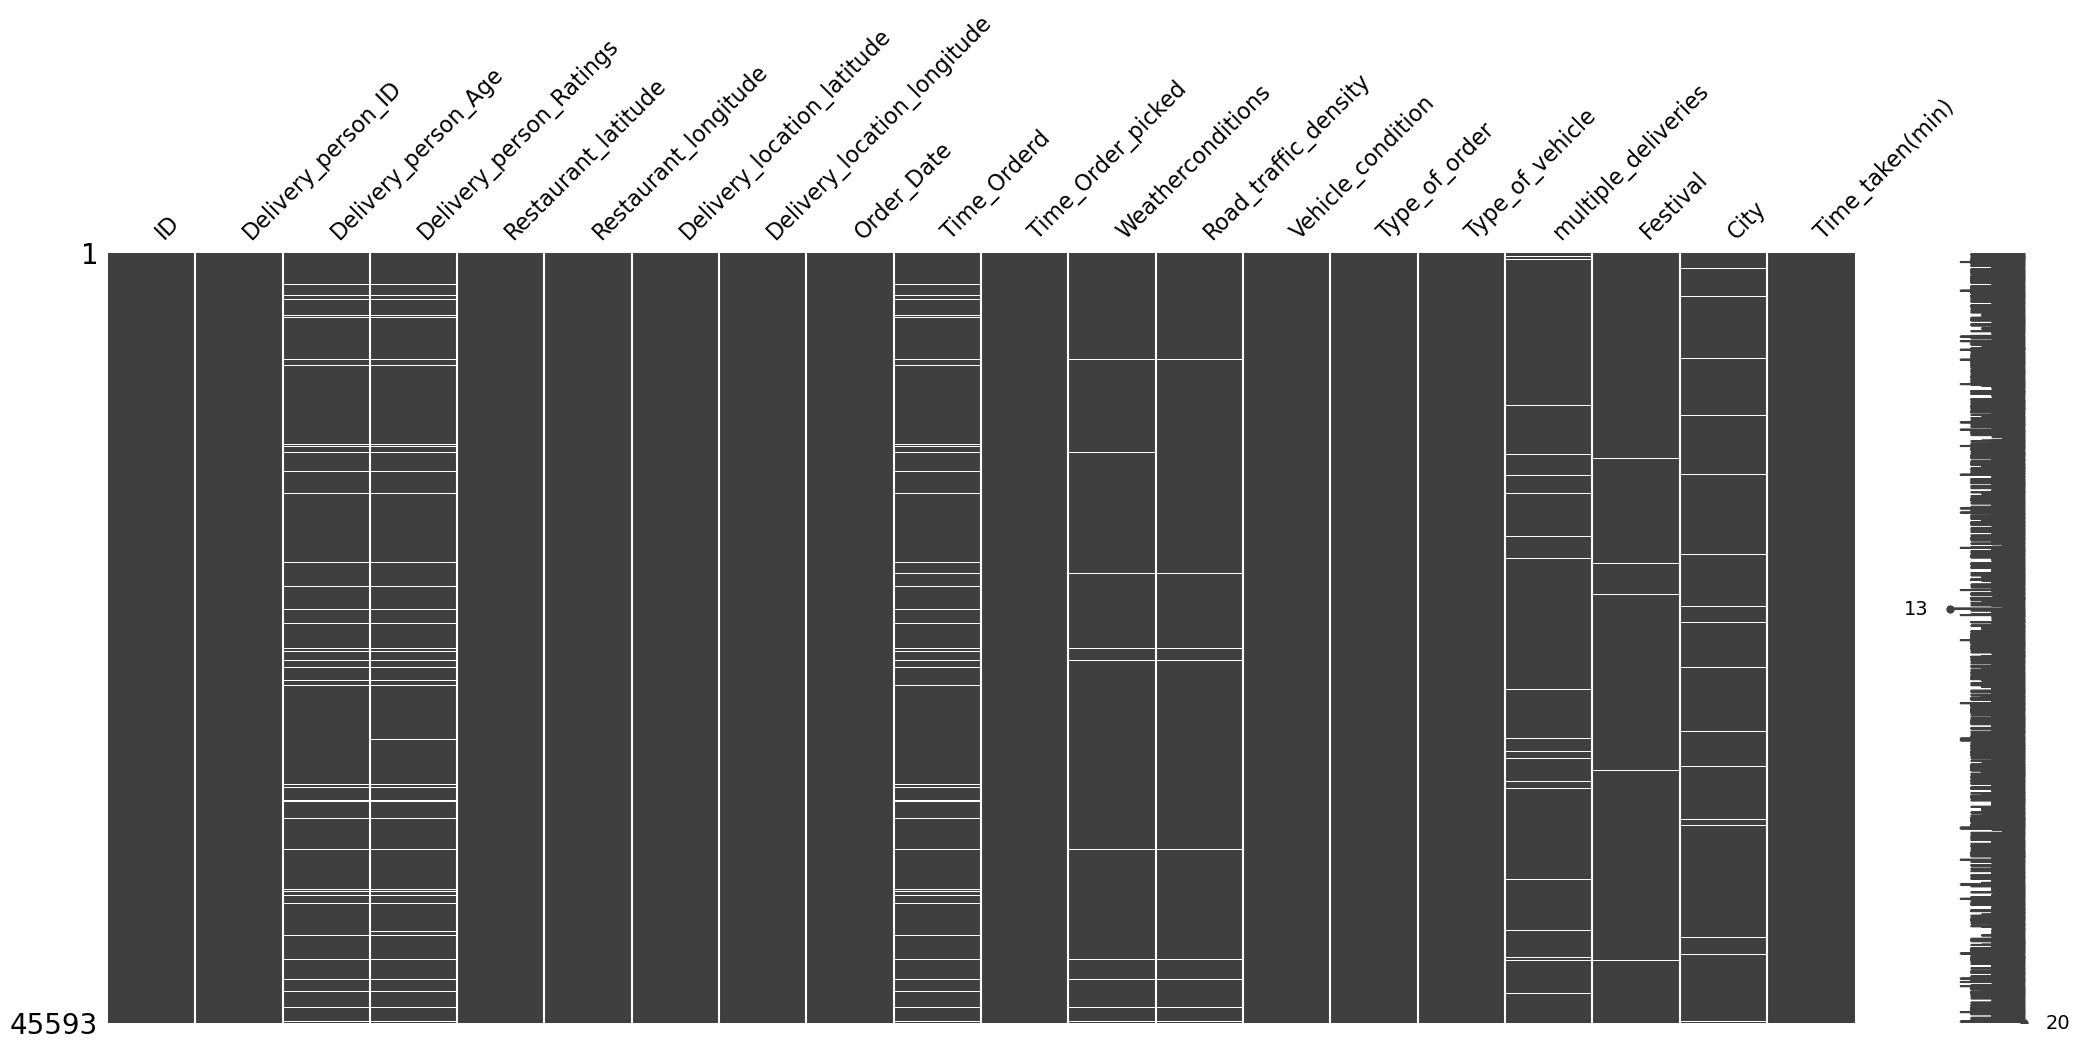

In [380]:
msno.matrix(missing_df)

<Axes: >

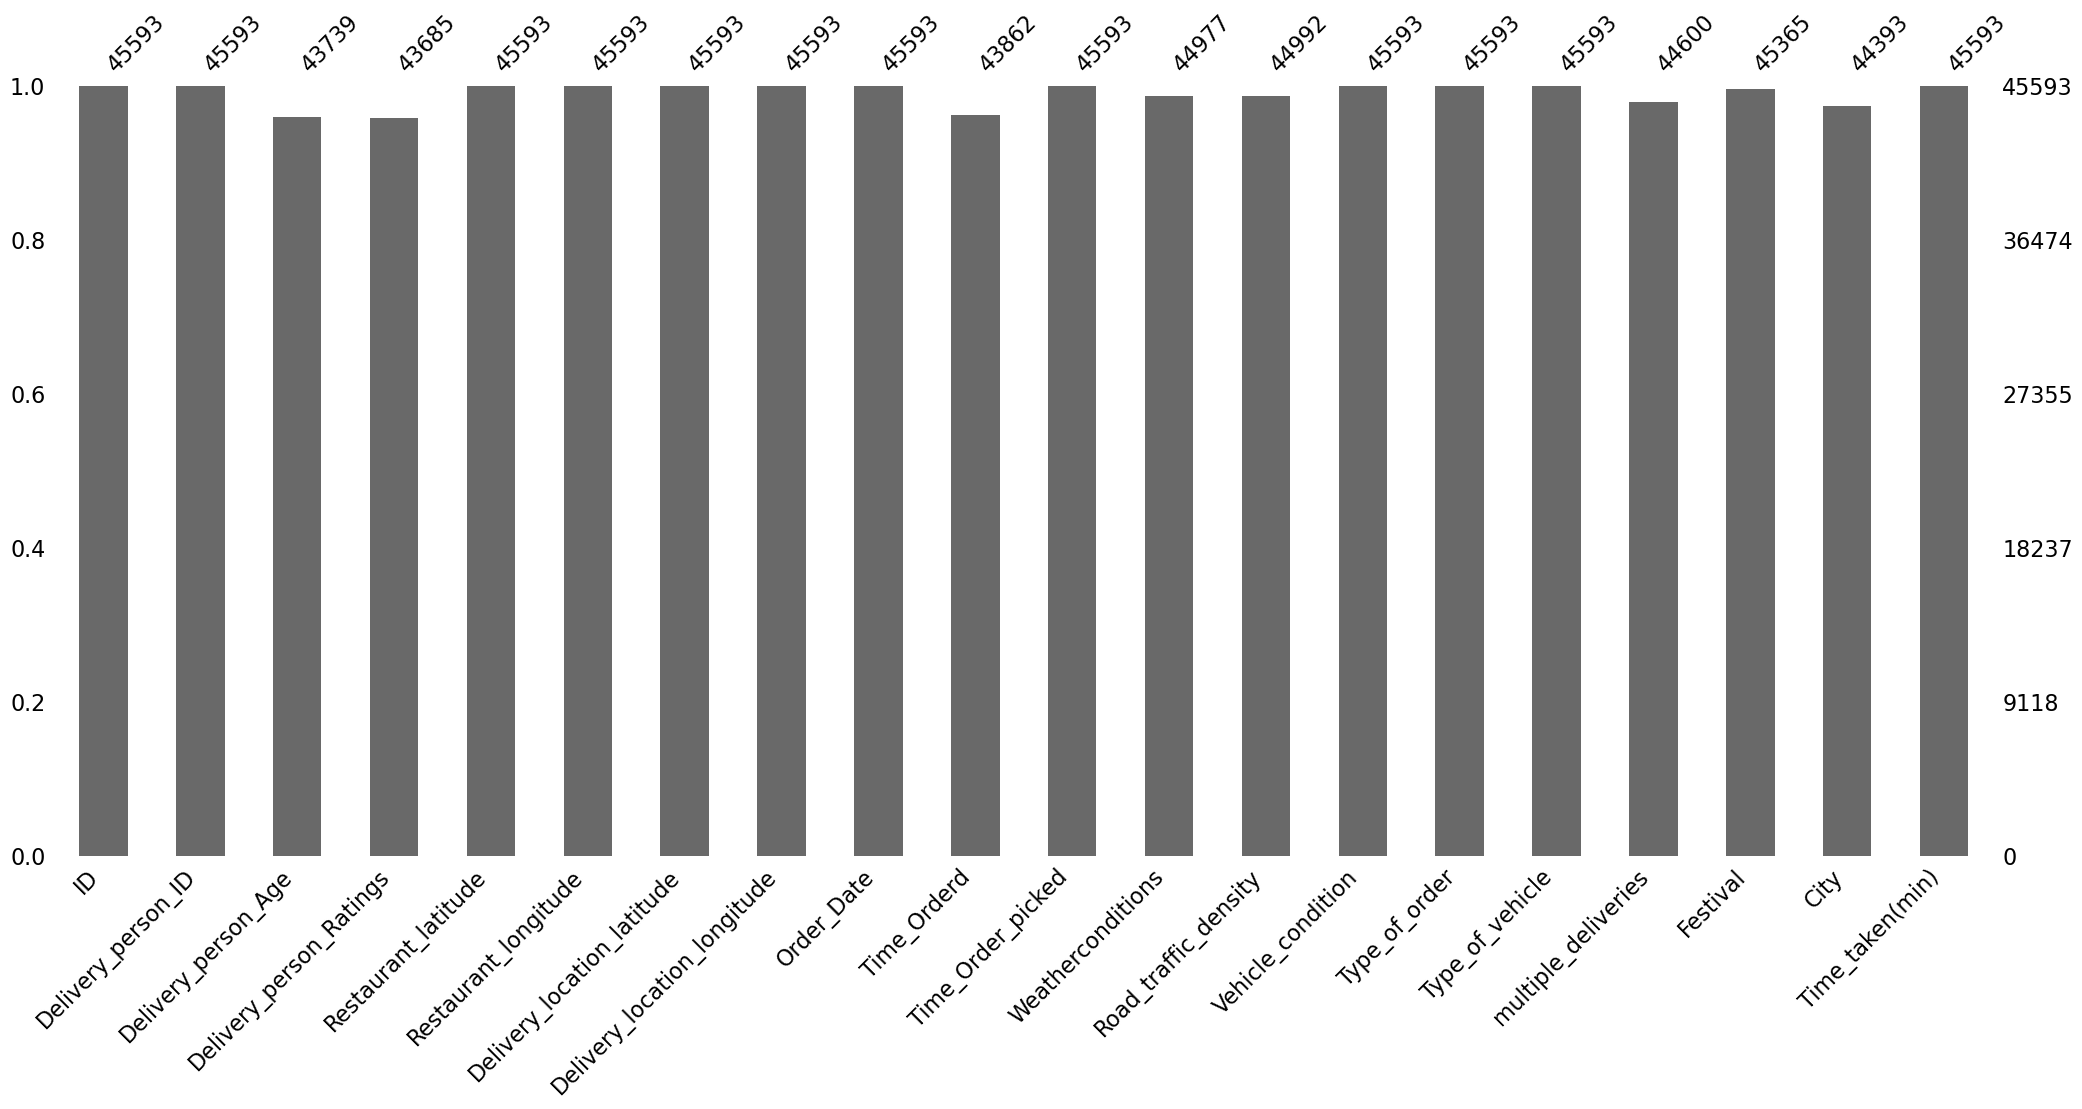

In [381]:
msno.bar(missing_df)

<Axes: >

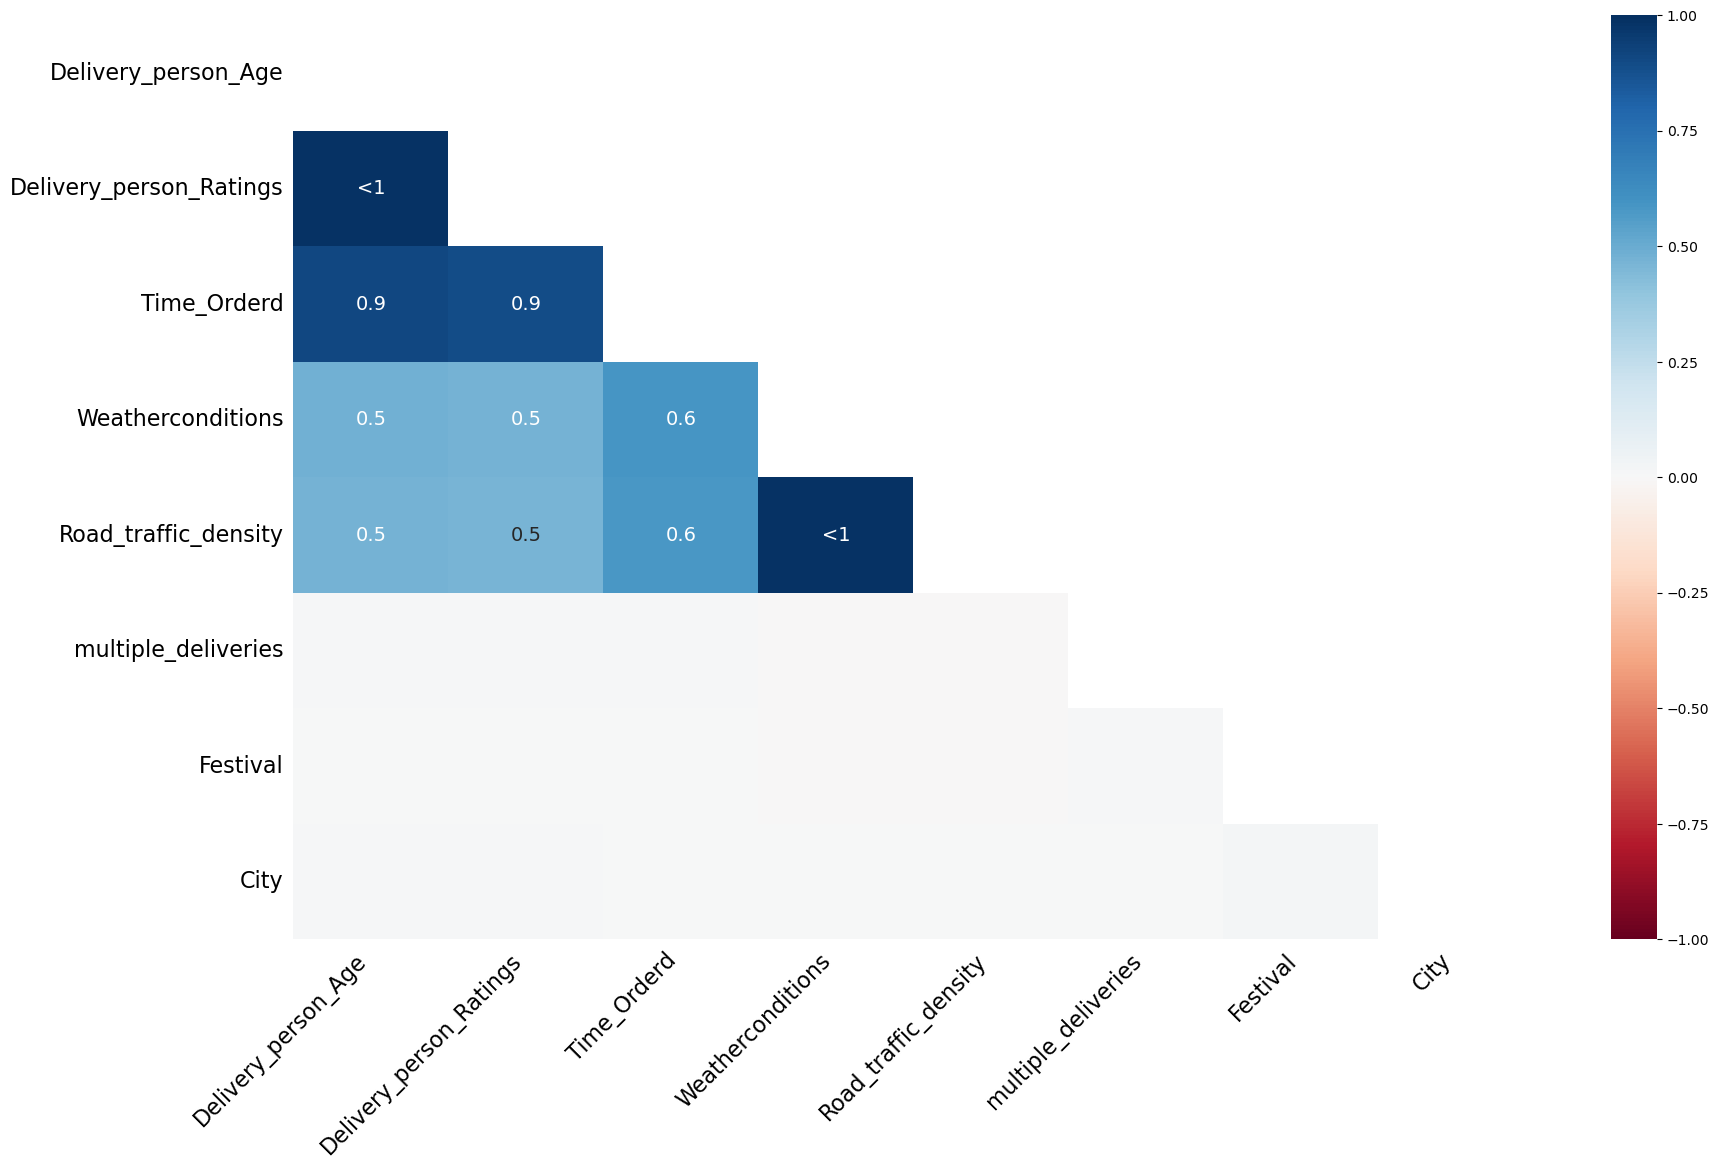

In [382]:
msno.heatmap(missing_df)

- weather condition and road traffic density seems to be related , as traffic is affected by weather and office time
- time order is also related to delivery persons rating delivery and delivery person age may be due to network issue data were just filled with nan


In [383]:
missing_df.Road_traffic_density.isna().sum()

601

In [384]:
missing_df[["Weatherconditions", "Road_traffic_density"]].isna().all(
    axis=1
).sum() / missing_df[["Weatherconditions", "Road_traffic_density"]].isna().sum()

Weatherconditions       0.975649
Road_traffic_density    1.000000
dtype: float64

In [385]:
missing_df[["Weatherconditions", "Road_traffic_density"]].isna().sum()

Weatherconditions       616
Road_traffic_density    601
dtype: int64

<Axes: >

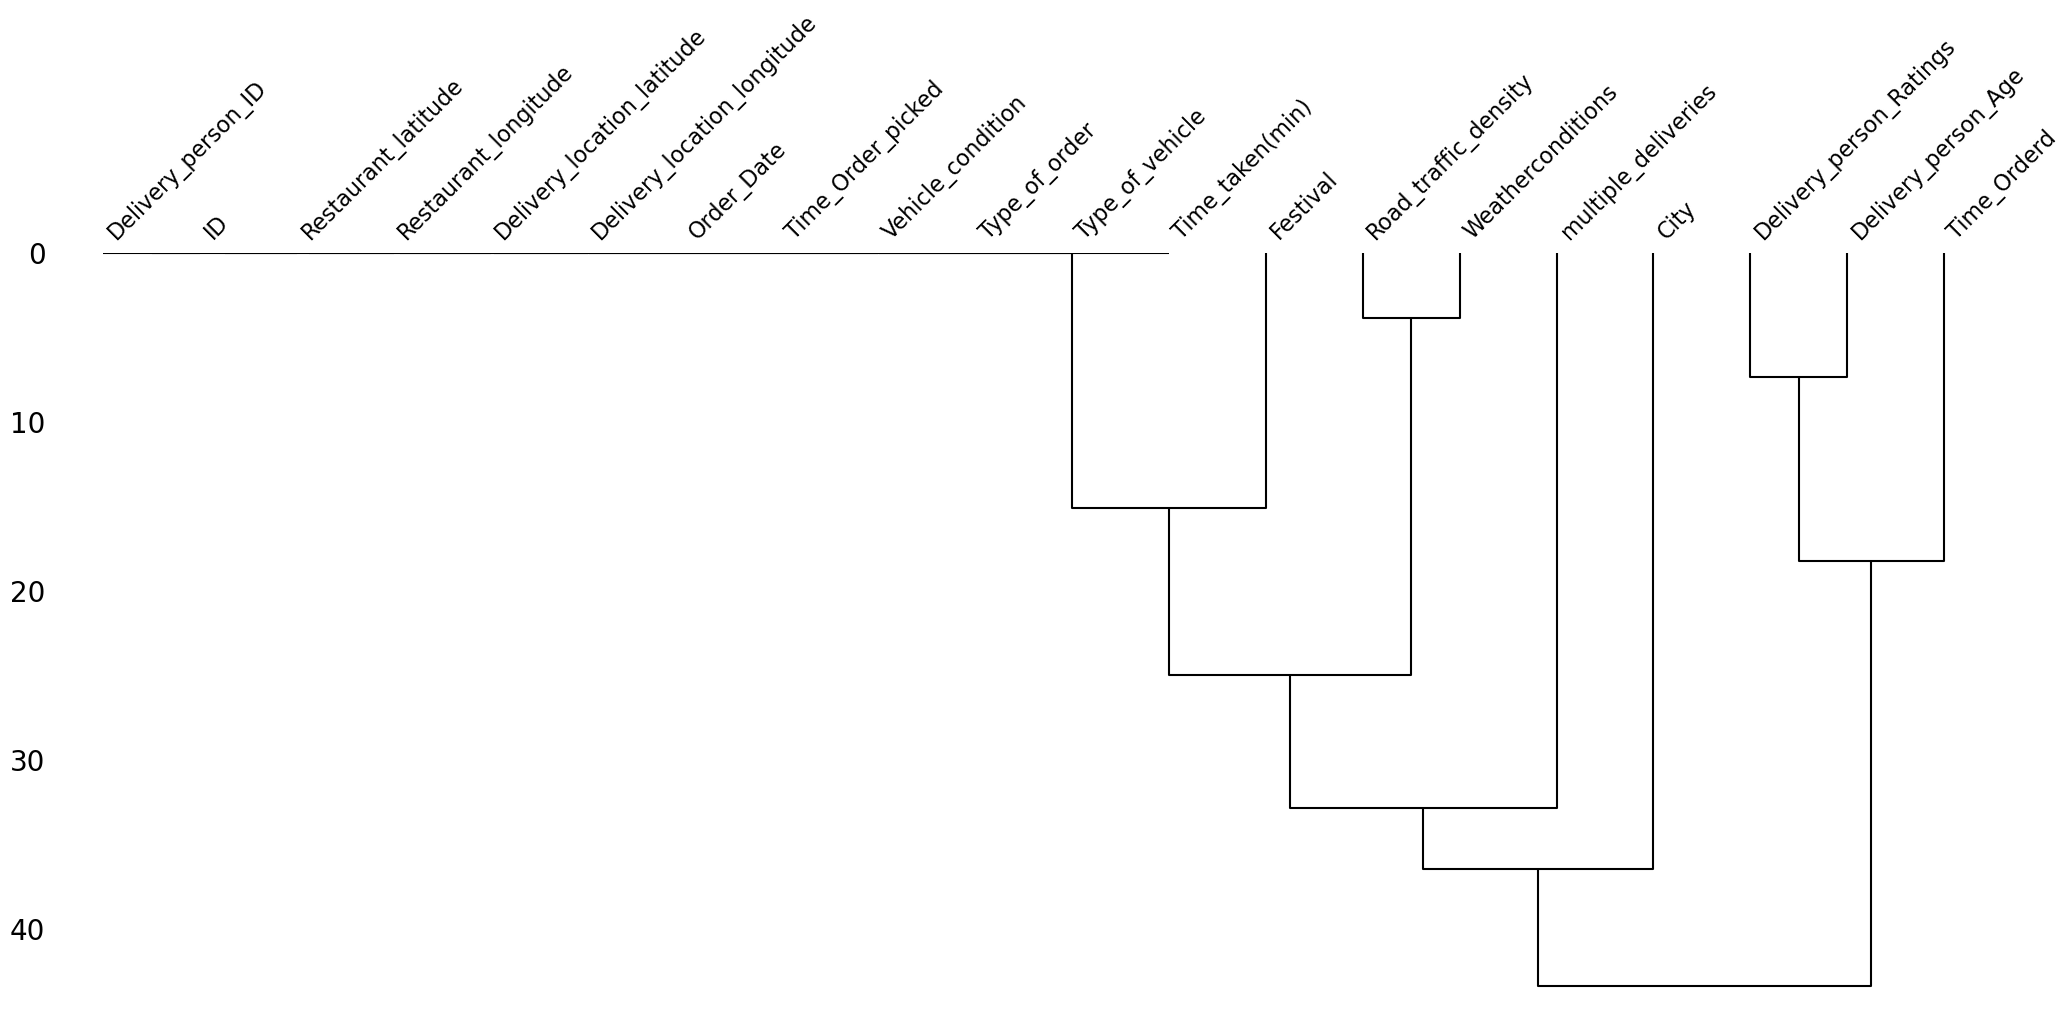

In [386]:
msno.dendrogram(missing_df)

- #### these features seems to be missing not at random , missing at one feature is related to missingness in other
- to be careful during imputation


In [387]:
# total missing percentage
(missing_df.isna().any(axis=1).sum() / missing_df.shape[0]) * 100

9.266773408198627

rows with at least a null value


# Data Cleaning


In [388]:
df.columns.tolist()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

### i) rider info-rating

In [389]:
def change_column_name(data: pd.DataFrame):
    return data.rename(
        # return data.rename(str.lower, axis=1).rename(
        {
            "Delivery_person_ID": "rider_id",
            "Delivery_person_Age": "rider_age",
            "Delivery_person_Ratings": "rider_rating",
            "Weatherconditions": "weather",
            "Road_traffic_density": "road_traffic",
        },
        axis=1,
    )

In [390]:
missing_df = change_column_name(missing_df)

In [391]:
missing_df.head()

,ID,rider_id,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather,road_traffic,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [392]:
missing_df[["rider_id", "ID"]].duplicated().sum()  # duplicated rows

0

In [393]:
cleaned_df = missing_df.drop(columns="ID")
cleaned_df.sample()

,rider_id,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather,road_traffic,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
4334,INDORES08DEL02,23,4.6,22.725748,75.898497,22.855747,76.028497,10-03-2022,22:55:00,23:00:00,Stormy,Low,2,Buffet,scooter,NaN,No,Metropolitian,(min) 15


In [394]:
cleaned_df.rider_id = cleaned_df["rider_id"].str.split("RES").str.get(0)
cleaned_df.rename(columns={"rider_id": "city_name"}, inplace=True)

In [395]:
cleaned_df.sample()

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather,road_traffic,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
27774,MYS,21,4.7,12.337928,76.617889,12.467928,76.747889,10-03-2022,18:40:00,18:45:00,Windy,Medium,2,Buffet,electric_scooter,1,No,Metropolitian,(min) 16


In [396]:
cleaned_df.rider_age.unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', nan, '28', '39', '30', '15',
       '50'], dtype=object)

In [397]:
minor_data = cleaned_df[cleaned_df["rider_age"].astype(float) < 18]
minor_index = minor_data.index.to_list()


cleaned_df["rider_age"] = cleaned_df["rider_age"].astype(float)

In [398]:
cleaned_df.rider_age.describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: rider_age, dtype: float64

min 15 years is suspicious


<Axes: ylabel='rider_age'>

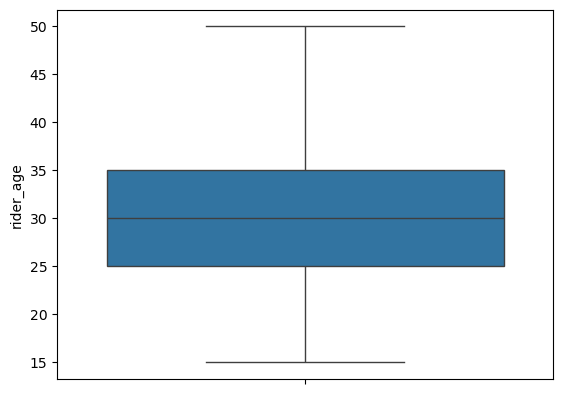

In [399]:
sns.boxplot(cleaned_df["rider_age"])

In [400]:
cleaned_df[cleaned_df["rider_age"] < 18]

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather,road_traffic,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
2387,JAP,15.0,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,INDO,15.0,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,SUR,15.0,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,CHEN,15.0,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,BANG,15.0,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,MUM,15.0,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,SUR,15.0,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,INDO,15.0,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,RANCHI,15.0,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,CHEN,15.0,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


In [401]:
cleaned_df[cleaned_df["rider_age"] < 18].shape

(38, 19)

- all the row below age 18 are filled with age 15 and contains all nans in time ordered ,weather and road_traffic and vehicle condition is rated with worse
- contains 38 rows so good to drop


In [402]:
cleaned_df[cleaned_df["rider_age"] >=18].shape[0] +cleaned_df[cleaned_df["rider_age"] <18].shape[0],cleaned_df.shape,cleaned_df.rider_age.isna().sum()#ignores nan if directly filtered

(43739, (45593, 19), 1854)

In [403]:
cleaned_df = cleaned_df[~(cleaned_df["rider_age"] < 18)]
cleaned_df.shape

(45555, 19)

In [404]:
cleaned_df["rider_rating"] = cleaned_df["rider_rating"].astype(float)
cleaned_df["rider_rating"].describe()

count    43647.000000
mean         4.636944
std          0.317217
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: rider_rating, dtype: float64

<Axes: ylabel='rider_rating'>

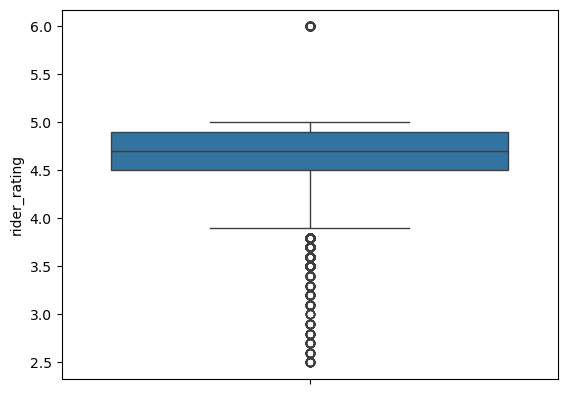

In [405]:
sns.boxplot(cleaned_df["rider_rating"])

In [406]:
cleaned_df[cleaned_df["rider_rating"] >5].shape

(53, 19)

In [407]:
cleaned_df=cleaned_df[~(cleaned_df["rider_rating"] >5)]
six_star_data = cleaned_df[~(cleaned_df["rider_rating"] >5)]
six_star_data_index = six_star_data.index.tolist()

In [408]:
cleaned_df.shape

(45502, 19)

### ii) Location 

In [409]:
location_sub = cleaned_df.iloc[:, 3:7]
location_sub.head()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982


this country lies between 6° 44'and 35°30' north latitude and 68°7' and 97° 25'eastlongitude

Latitude: 6°44′N to 35°30′N

Longitude: 68°7′E to 97°25′E


In [410]:
location_sub.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,45502.000000,45502.000000,45502.000000,45502.000000
mean,17.046293,70.326557,17.468434,70.848718
std,8.131457,22.591753,7.334058,21.111306
min,-30.905562,-88.352885,0.010000,0.010000
25%,12.933284,73.170283,12.988453,73.280000
50%,18.551440,75.898497,18.634382,76.002471
75%,22.728163,78.045043,22.785049,78.105359
max,30.914057,88.433452,31.054057,88.563452


In [411]:
# no problem in maximum there is problem in min values
lower_lat = 6.44
lower_long = 68.7

In [412]:
location_sub.loc[
    (location_sub["Restaurant_latitude"] < lower_lat)
    | (location_sub["Delivery_location_latitude"] < lower_lat)
    | (location_sub["Restaurant_longitude"] < lower_long)
    | (location_sub["Delivery_location_longitude"] < lower_long)
].sample(20)

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
9919,0.000000,0.000000,0.130000,0.130000
25463,0.000000,0.000000,0.080000,0.080000
22016,-25.450377,-81.834236,25.580377,81.964236
8422,-23.399250,85.390464,23.419250,85.410464
10426,0.000000,0.000000,0.010000,0.010000
17013,0.000000,0.000000,0.130000,0.130000
31862,0.000000,0.000000,0.040000,0.040000
17062,0.000000,0.000000,0.070000,0.070000
17590,0.000000,0.000000,0.090000,0.090000
27147,0.000000,0.000000,0.050000,0.050000


In [413]:
location_sub.loc[
    (location_sub["Restaurant_latitude"] < lower_lat)
    | (location_sub["Delivery_location_latitude"] < lower_lat)
    | (location_sub["Restaurant_longitude"] < lower_long)
    | (location_sub["Delivery_location_longitude"] < lower_long)
].describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,4029.000000,4029.000000,4029.000000,4029.000000
mean,-2.024551,2.522899,2.087684,7.764720
std,6.385871,24.383056,6.386195,23.271934
min,-30.905562,-88.352885,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


##### problem in max is present in Restaurant_latitude

this country lies between 6° 44'and 35°30' north latitude and 68°7' and 97° 25'eastlongitude


<Axes: >

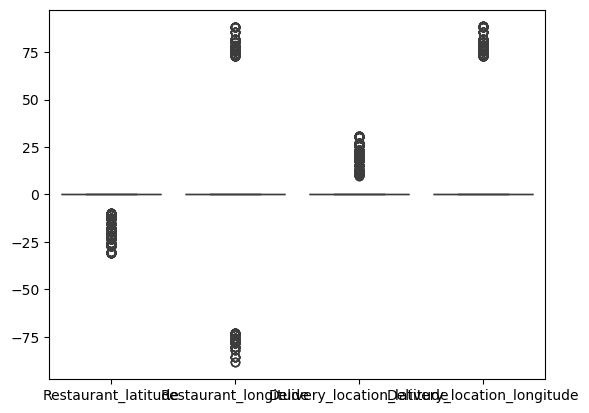

In [414]:
sns.boxplot(
    location_sub.loc[
        (location_sub["Restaurant_latitude"] < lower_lat)
        | (location_sub["Delivery_location_latitude"] < lower_lat)
        | (location_sub["Restaurant_longitude"] < lower_long)
        | (location_sub["Delivery_location_longitude"] < lower_long)
    ]
)

#### ! we can take absolute for negative latitude and and cant easily fill zero value latitude and can be filled with nan then fill with advanced imputation with multivariant analysis


(array([1, 2, 3, 4]),
 [Text(1, 0, 'Restaurant_latitude'),
  Text(2, 0, 'Restaurant_longitude'),
  Text(3, 0, 'Delivery_location_latitude'),
  Text(4, 0, 'Delivery_location_longitude')])

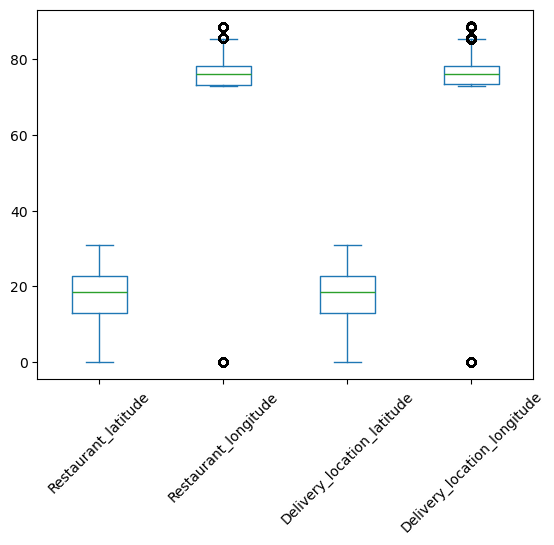

In [415]:
location_sub.abs().plot(kind="box")
plt.xticks(rotation=45)

In [416]:
location_sub.abs().loc[
    lambda absdf: (absdf["Restaurant_latitude"] < lower_lat)
    | (absdf["Delivery_location_latitude"] < lower_lat)
    | (absdf["Restaurant_longitude"] < lower_long)
    | (absdf["Delivery_location_longitude"] < lower_long)
].shape

(3630, 4)

In [417]:
location_sub.abs().loc[
    lambda absdf: (absdf["Restaurant_latitude"] < 1)
    | (absdf["Delivery_location_latitude"] < 1)
    | (absdf["Restaurant_longitude"] < 1)
    | (absdf["Delivery_location_longitude"] < 1)
].shape

(3630, 4)

### all values are less then 1

In [418]:
def clean_lat_long(data: pd.DataFrame, threshold=1):
    location_cols = location_sub.columns.tolist()
    return data.assign(
        **{
            col: (np.where(data[col] < threshold, np.nan, data[col].values))
            for col in location_cols
        }
    )


In [419]:
cleaned_df[location_sub.columns].abs().loc[
    lambda absdf: (absdf["Restaurant_latitude"] < lower_lat)
    | (absdf["Delivery_location_latitude"] < lower_lat)
    | (absdf["Restaurant_longitude"] < lower_long)
    | (absdf["Delivery_location_longitude"] < lower_long)
].shape

(3630, 4)

In [420]:
cleaned_df[location_sub.columns].shape

(45502, 4)

In [421]:
cleaned_df[location_sub.columns]=cleaned_df[location_sub.columns].abs()

In [422]:
cleaned_df[location_sub.columns].describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,45502.000000,45502.000000,45502.000000,45502.000000
mean,17.404823,70.785107,17.468434,70.848718
std,7.332705,21.111115,7.334058,21.111306
min,0.000000,0.000000,0.010000,0.010000
25%,12.934179,73.170283,12.988453,73.280000
50%,18.554382,75.898497,18.634382,76.002471
75%,22.732225,78.046106,22.785049,78.105359
max,30.914057,88.433452,31.054057,88.563452


In [423]:
cleaned_df[location_sub.columns].describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,45502.000000,45502.000000,45502.000000,45502.000000
mean,17.404823,70.785107,17.468434,70.848718
std,7.332705,21.111115,7.334058,21.111306
min,0.000000,0.000000,0.010000,0.010000
25%,12.934179,73.170283,12.988453,73.280000
50%,18.554382,75.898497,18.634382,76.002471
75%,22.732225,78.046106,22.785049,78.105359
max,30.914057,88.433452,31.054057,88.563452


In [424]:
cleaned_df[location_sub.columns].abs().loc[
    lambda absdf: (absdf["Restaurant_latitude"] < 1)
    | (absdf["Delivery_location_latitude"] < 1)
    | (absdf["Restaurant_longitude"] < 1)
    | (absdf["Delivery_location_longitude"] < 1)
].shape

(3630, 4)

In [425]:
cleaned_df=clean_lat_long(cleaned_df)

In [426]:
cleaned_df[location_sub.columns].abs().loc[
    lambda absdf: (absdf["Restaurant_latitude"] < 1)
    | (absdf["Delivery_location_latitude"] < 1)
    | (absdf["Restaurant_longitude"] < 1)
    | (absdf["Delivery_location_longitude"] < 1)
].shape

(0, 4)

In [427]:
cleaned_df[location_sub.columns].describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,41872.000000,41872.000000,41872.000000,41872.000000
mean,18.913696,76.921664,18.977356,76.985325
std,5.467265,3.503107,5.469056,3.503260
min,9.957144,72.768726,9.967144,72.778726
25%,12.986047,73.897902,13.065996,73.940327
50%,19.065838,76.618203,19.124049,76.662620
75%,22.751234,78.368855,22.820040,78.405467
max,30.914057,88.433452,31.054057,88.563452


#### helps in dvc pipelining

def data_cleaning(data: pd.DataFrame):
data


### iii) ordered date - Date-Time

In [428]:
cleaned_df["Order_Date"].unique()

array(['19-03-2022', '25-03-2022', '05-04-2022', '26-03-2022',
       '11-03-2022', '04-03-2022', '14-03-2022', '20-03-2022',
       '12-02-2022', '13-02-2022', '14-02-2022', '02-04-2022',
       '01-03-2022', '16-03-2022', '15-02-2022', '10-03-2022',
       '27-03-2022', '12-03-2022', '01-04-2022', '05-03-2022',
       '11-02-2022', '08-03-2022', '03-04-2022', '30-03-2022',
       '28-03-2022', '18-03-2022', '06-04-2022', '04-04-2022',
       '24-03-2022', '09-03-2022', '02-03-2022', '13-03-2022',
       '29-03-2022', '31-03-2022', '17-03-2022', '07-03-2022',
       '15-03-2022', '16-02-2022', '03-03-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '06-03-2022', '21-03-2022'],
      dtype=object)

In [429]:
cleaned_df.Order_Date.isna().sum()

0

In [430]:
cleaned_df["Order_Date"]=pd.to_datetime(cleaned_df["Order_Date"],dayfirst=True)
cleaned_df["Order_Date"].max()-cleaned_df["Order_Date"].min()

Timedelta('54 days 00:00:00')

In [431]:
cleaned_df["Order_Date"].min(),"/n",cleaned_df["Order_Date"].max()

(Timestamp('2022-02-11 00:00:00'), '/n', Timestamp('2022-04-06 00:00:00'))

In [432]:
def extract_date_time(ser:pd.Series):
    date_col=pd.to_datetime(ser,dayfirst=True)
    return(
        pd.DataFrame({
            "Day":date_col.dt.day,
            "month":date_col.dt.month,
            "year":date_col.dt.year,
            "day_of_week":date_col.dt.day_name(),
            "Weekend":date_col.dt.day_name().isin(["Saturday","Sunday"]).astype(int)
        })
    )

In [433]:
dates=extract_date_time(cleaned_df["Order_Date"])
dates.head()

,Day,month,year,day_of_week,Weekend
0,19,3,2022,Saturday,1
1,25,3,2022,Friday,0
2,19,3,2022,Saturday,1
3,5,4,2022,Tuesday,0
4,26,3,2022,Saturday,1


In [434]:
# cleaned_df=return_date_time(cleaned_df["Order_Date"])
cleaned_df = pd.concat([cleaned_df, extract_date_time(cleaned_df["Order_Date"])], axis=1)


In [435]:
cleaned_df.drop(columns="Order_Date").head()

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,weather,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Day,month,year,day_of_week,Weekend
0,INDO,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,...,motorcycle,0,No,Urban,(min) 24,19,3,2022,Saturday,1
1,BANG,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,...,scooter,1,No,Metropolitian,(min) 33,25,3,2022,Friday,0
2,BANG,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,Sandstorms,...,motorcycle,1,No,Urban,(min) 26,19,3,2022,Saturday,1
3,COIMB,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,...,motorcycle,1,No,Metropolitian,(min) 21,5,4,2022,Tuesday,0
4,CHEN,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,...,scooter,1,No,Metropolitian,(min) 30,26,3,2022,Saturday,1


#### Time 

In [436]:
# cleaned_df["Time_Orderd"]=pd.to_datetime(cleaned_df["Time_Orderd"],format="mixed").dt.time
# cleaned_df["Time_Order_picked"]=pd.to_datetime(cleaned_df["Time_Order_picked"],format="mixed").dt.time
# cleaned_df["ordered_time"]=pd.to_datetime(cleaned_df["Time_Orderd"],format="mixed").dt.hour
# cleaned_df["picked_time"]=pd.to_datetime(cleaned_df["Time_Order_picked"],format="mixed").dt.hour

In [437]:
cleaned_df.drop(columns="year",inplace=True)

In [438]:
def extract_time_of_the_day(ser: pd.Series):
    ser = pd.to_datetime(ser).dt.hour
    return np.select(
        condlist=[
            (ser.between(6, 12, inclusive="left")),
            (ser.between(12, 17, inclusive="left")),
            (ser.between(17, 20, inclusive="left")),
            (ser.between(20, 24, inclusive="left")),
        ],
        choicelist=["morning", "afternoon", "evening", "night"],
        default="after_midnight",
    )

In [439]:
# cleaned_df=pd.concat([cleaned_df,extract_time_of_the_day(cleaned_df["Time_Orderd"])])


In [440]:
time_subset=cleaned_df.loc[:,["Time_Orderd","Time_Order_picked"]]
time_subset

,Time_Orderd,Time_Order_picked
0,11:30:00,11:45:00
1,19:45:00,19:50:00
2,08:30:00,08:45:00
3,18:00:00,18:10:00
4,13:30:00,13:45:00
...,...,...
45588,11:35:00,11:45:00
45589,19:55:00,20:10:00
45590,23:50:00,00:05:00
45591,13:35:00,13:40:00


In [441]:
(time_subset.dtypes)

Time_Orderd          object
Time_Order_picked    object
dtype: object

In [442]:
filtered_time=(
    time_subset.assign(
        **{
            col: pd.to_datetime(
                time_subset[col].replace("NaN", np.NaN), format="mixed")
            for col in time_subset.columns.tolist()
        }
    ).assign(
        pickup_time=lambda x: (
            x["Time_Order_picked"] - x["Time_Orderd"]
        ).dt.total_seconds()
        / 60,
        Time_Orderd_hour=lambda x: x["Time_Orderd"].dt.hour,
        Time_Orderd_of_day=lambda x: extract_time_of_the_day(x["Time_Orderd"])
    )
    .drop(columns=["Time_Orderd", "Time_Order_picked"])
)
filtered_time

,pickup_time,Time_Orderd_hour,Time_Orderd_of_day
0,15.0,11.0,morning
1,5.0,19.0,evening
2,15.0,8.0,morning
3,10.0,18.0,evening
4,15.0,13.0,afternoon
...,...,...,...
45588,10.0,11.0,morning
45589,15.0,19.0,evening
45590,-1425.0,23.0,night
45591,5.0,13.0,afternoon


In [443]:
cleaned_df = pd.concat([cleaned_df, filtered_time], axis=1)

In [444]:
cleaned_df.head()

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Festival,City,Time_taken(min),Day,month,day_of_week,Weekend,pickup_time,Time_Orderd_hour,Time_Orderd_of_day
0,INDO,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,No,Urban,(min) 24,19,3,Saturday,1,15.0,11.0,morning
1,BANG,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,No,Metropolitian,(min) 33,25,3,Friday,0,5.0,19.0,evening
2,BANG,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,No,Urban,(min) 26,19,3,Saturday,1,15.0,8.0,morning
3,COIMB,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,No,Metropolitian,(min) 21,5,4,Tuesday,0,10.0,18.0,evening
4,CHEN,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,No,Metropolitian,(min) 30,26,3,Saturday,1,15.0,13.0,afternoon


In [445]:
cleaned_df.rename({"pickup_time":"pick_time_minutes"},axis=1)

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Festival,City,Time_taken(min),Day,month,day_of_week,Weekend,pick_time_minutes,Time_Orderd_hour,Time_Orderd_of_day
0,INDO,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,No,Urban,(min) 24,19,3,Saturday,1,15.0,11.0,morning
1,BANG,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,No,Metropolitian,(min) 33,25,3,Friday,0,5.0,19.0,evening
2,BANG,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,No,Urban,(min) 26,19,3,Saturday,1,15.0,8.0,morning
3,COIMB,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,No,Metropolitian,(min) 21,5,4,Tuesday,0,10.0,18.0,evening
4,CHEN,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,No,Metropolitian,(min) 30,26,3,Saturday,1,15.0,13.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAP,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,...,No,Metropolitian,(min) 32,24,3,Thursday,0,10.0,11.0,morning
45589,AGR,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,19:55:00,20:10:00,...,No,Metropolitian,(min) 36,16,2,Wednesday,0,15.0,19.0,evening
45590,CHEN,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,...,No,Metropolitian,(min) 16,11,3,Friday,0,-1425.0,23.0,night
45591,COIMB,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,...,No,Metropolitian,(min) 26,7,3,Monday,0,5.0,13.0,afternoon


In [446]:
cleaned_df.weather.isna().sum()

525

#### Traffic

In [447]:
cleaned_df.iloc[:,5:]

,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather,road_traffic,Vehicle_condition,Type_of_order,Type_of_vehicle,...,Festival,City,Time_taken(min),Day,month,day_of_week,Weekend,pickup_time,Time_Orderd_hour,Time_Orderd_of_day
0,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,...,No,Urban,(min) 24,19,3,Saturday,1,15.0,11.0,morning
1,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,...,No,Metropolitian,(min) 33,25,3,Friday,0,5.0,19.0,evening
2,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,...,No,Urban,(min) 26,19,3,Saturday,1,15.0,8.0,morning
3,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,...,No,Metropolitian,(min) 21,5,4,Tuesday,0,10.0,18.0,evening
4,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,...,No,Metropolitian,(min) 30,26,3,Saturday,1,15.0,13.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,...,No,Metropolitian,(min) 32,24,3,Thursday,0,10.0,11.0,morning
45589,NaN,NaN,2022-02-16,19:55:00,20:10:00,Windy,Jam,0,Buffet,motorcycle,...,No,Metropolitian,(min) 36,16,2,Wednesday,0,15.0,19.0,evening
45590,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,...,No,Metropolitian,(min) 16,11,3,Friday,0,-1425.0,23.0,night
45591,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,...,No,Metropolitian,(min) 26,7,3,Monday,0,5.0,13.0,afternoon


In [448]:
cleaned_df.road_traffic.value_counts(dropna=False)

road_traffic
Low        15477
Jam        14143
Medium     10947
High        4425
NaN          510
Name: count, dtype: int64

In [449]:
missing_df.road_traffic.unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', nan], dtype=object)

In [450]:
cleaned_df.road_traffic=cleaned_df.road_traffic.str.rstrip()

In [451]:
cleaned_df.road_traffic.unique()

array(['High', 'Jam', 'Low', 'Medium', nan], dtype=object)

In [452]:
cleaned_df["Vehicle_condition"].unique()

array([2, 0, 1, 3])

In [453]:
cleaned_df["Type_of_order"].value_counts(dropna=False)

Type_of_order
Snack      11512
Meal       11435
Drinks     11294
Buffet     11261
Name: count, dtype: int64

In [454]:
cleaned_df["Type_of_order"].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [455]:
cleaned_df["Type_of_order"]=cleaned_df["Type_of_order"].str.strip()

In [456]:
cleaned_df["Type_of_vehicle"].value_counts(dropna=False)

Type_of_vehicle
motorcycle           26427
scooter              15244
electric_scooter      3778
bicycle                 53
Name: count, dtype: int64

In [457]:
cleaned_df["Type_of_vehicle"]=cleaned_df["Type_of_vehicle"].str.strip()

#### multiple deliveries

In [458]:
cleaned_df["multiple_deliveries"].value_counts(dropna=False)

multiple_deliveries
1      28109
0      14057
2       1982
NaN      993
3        361
Name: count, dtype: int64

In [459]:
cleaned_df["multiple_deliveries"]=cleaned_df["multiple_deliveries"].str.strip().astype(float)
cleaned_df["multiple_deliveries"].value_counts(dropna=False)

multiple_deliveries
1.0    28109
0.0    14057
2.0     1982
NaN      993
3.0      361
Name: count, dtype: int64

In [460]:
cleaned_df["Festival"].value_counts(dropna=False)

Festival
No      44380
Yes       894
NaN       228
Name: count, dtype: int64

In [461]:
cleaned_df.Festival=cleaned_df.Festival.str.strip()


In [462]:
cleaned_df["City"].value_counts(dropna=False)

City
Metropolitian     34029
Urban             10111
NaN                1198
Semi-Urban          164
Name: count, dtype: int64

In [463]:
cleaned_df["City"]=cleaned_df["City"].str.strip()

## Almost all categorical features contained a trailing whitespace 

#### Target column 

In [464]:
cleaned_df["Time_taken(min)"].unique()

array(['(min) 24', '(min) 33', '(min) 26', '(min) 21', '(min) 30',
       '(min) 40', '(min) 32', '(min) 34', '(min) 46', '(min) 23',
       '(min) 20', '(min) 41', '(min) 15', '(min) 36', '(min) 39',
       '(min) 18', '(min) 38', '(min) 47', '(min) 12', '(min) 22',
       '(min) 25', '(min) 35', '(min) 10', '(min) 19', '(min) 11',
       '(min) 28', '(min) 52', '(min) 16', '(min) 27', '(min) 49',
       '(min) 17', '(min) 14', '(min) 37', '(min) 44', '(min) 42',
       '(min) 31', '(min) 13', '(min) 29', '(min) 50', '(min) 43',
       '(min) 48', '(min) 54', '(min) 53', '(min) 45', '(min) 51'],
      dtype=object)

In [465]:
cleaned_df["Time_taken(min)"]=cleaned_df["Time_taken(min)"].str.replace("(min)","").astype(int)


In [466]:
cleaned_df["rider_rating"].agg(["min","max"])

min    2.5
max    5.0
Name: rider_rating, dtype: float64

(array([1, 2, 3, 4]),
 [Text(1, 0, 'Restaurant_latitude'),
  Text(2, 0, 'Restaurant_longitude'),
  Text(3, 0, 'Delivery_location_latitude'),
  Text(4, 0, 'Delivery_location_longitude')])

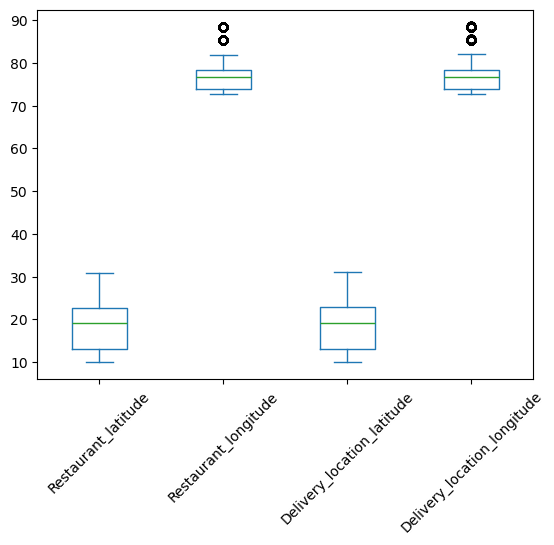

In [467]:
cleaned_df[location_sub.columns].plot(kind="box")
plt.xticks(rotation=45)

In [468]:
cleaned_df.drop(["Time_Orderd","Time_Order_picked"],axis=1,inplace=True)

In [469]:
cat_datas=cleaned_df.select_dtypes(include="object").columns.tolist()
for col in cat_datas:
    print("Unique values in  ",col,"=",cleaned_df[col].unique())


Unique values in   city_name = ['INDO' 'BANG' 'COIMB' 'CHEN' 'HYD' 'RANCHI' 'MYS' 'DEH' 'KOC' 'PUNE'
 'LUDH' 'KNP' 'MUM' 'KOL' 'JAP' 'SUR' 'GOA' 'AURG' 'AGR' 'VAD' 'ALH' 'BHP']
Unique values in   weather = ['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy' nan]
Unique values in   road_traffic = ['High' 'Jam' 'Low' 'Medium' nan]
Unique values in   Type_of_order = ['Snack' 'Drinks' 'Buffet' 'Meal']
Unique values in   Type_of_vehicle = ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
Unique values in   Festival = ['No' 'Yes' nan]
Unique values in   City = ['Urban' 'Metropolitian' 'Semi-Urban' nan]
Unique values in   day_of_week = ['Saturday' 'Friday' 'Tuesday' 'Monday' 'Sunday' 'Wednesday' 'Thursday']
Unique values in   Time_Orderd_of_day = ['morning' 'evening' 'afternoon' 'night' 'after_midnight']


<Axes: >

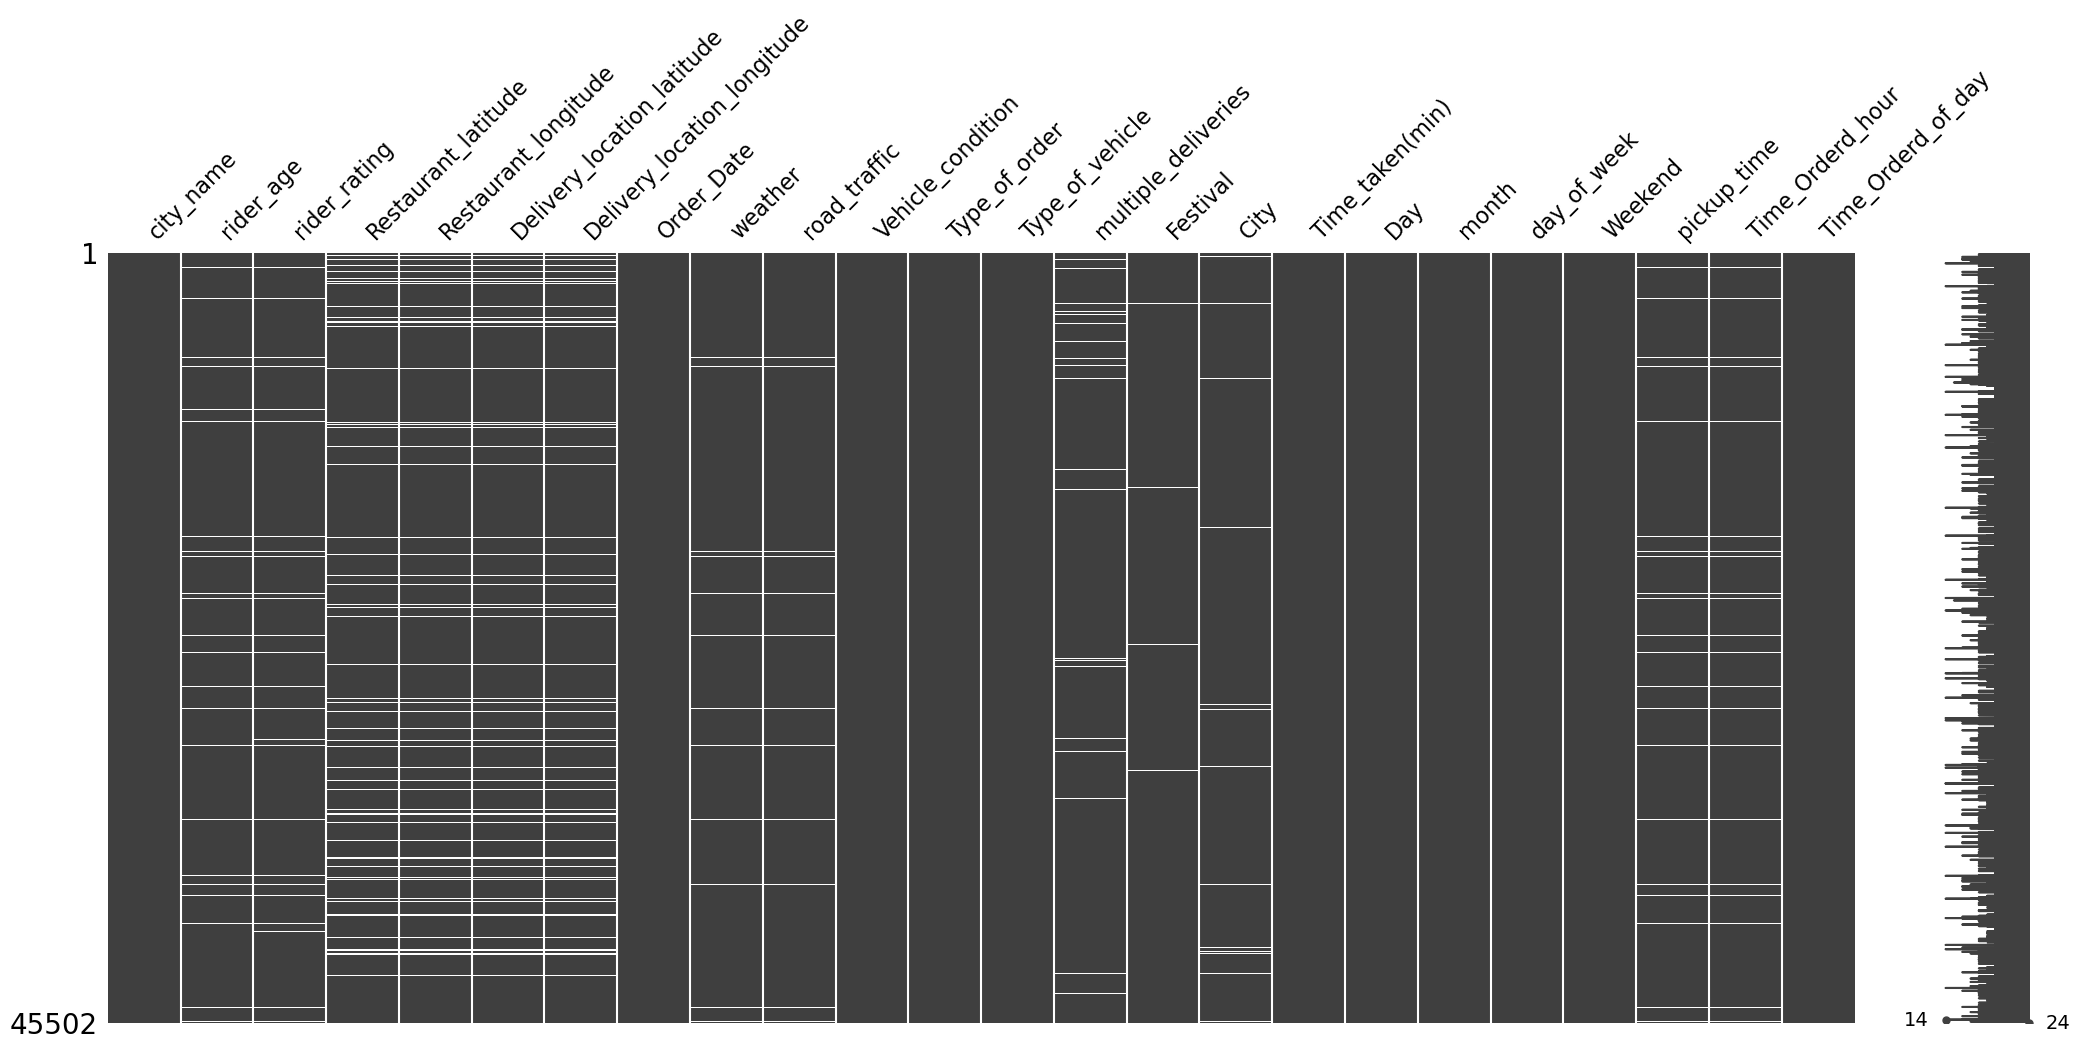

In [470]:
msno.matrix(cleaned_df)

<Axes: >

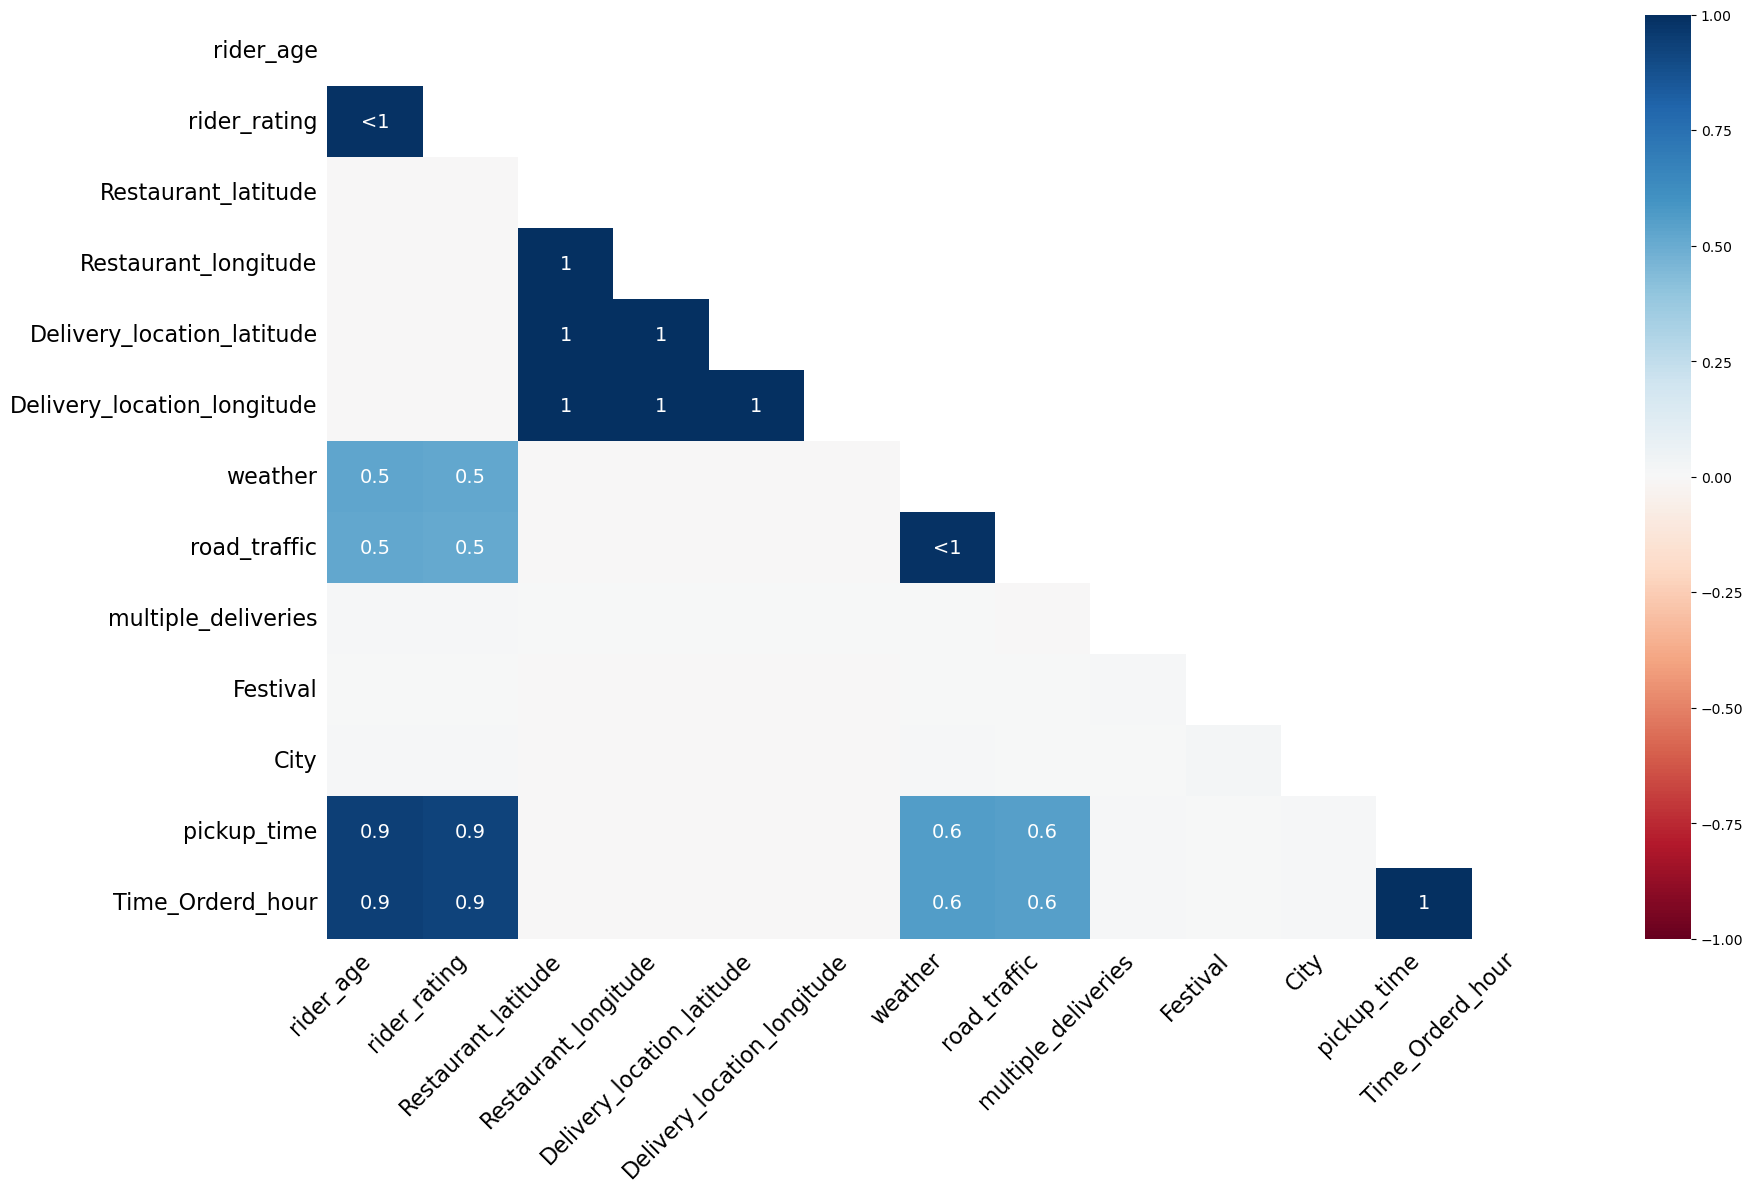

In [471]:
msno.heatmap(cleaned_df)

In [ ]:
cleaned_df.shape,df.shape,df.shape[0]-cleaned_df.shape[0]   

((45502, 24), (45593, 20), 91)

In [473]:
cleaned_df.rider_age.value_counts()

rider_age
35.0    2262
36.0    2260
37.0    2227
30.0    2226
38.0    2219
24.0    2210
32.0    2202
22.0    2196
29.0    2191
33.0    2187
28.0    2179
25.0    2174
34.0    2166
26.0    2159
21.0    2153
27.0    2150
39.0    2144
20.0    2136
31.0    2120
23.0    2087
Name: count, dtype: int64

In [474]:
def calculate_haversine_distance(df):
    location_columns = df.columns.tolist()
    
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Haversine formula
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c  

    # Return dataframe with distance column added
    return df.assign(distance=distance)

In [478]:
cleaned_df = pd.concat(
    [cleaned_df, calculate_haversine_distance(cleaned_df[location_sub.columns])["distance"]],
    axis=1
)


In [481]:
cleaned_df.tail()

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,weather,road_traffic,...,City,Time_taken(min),Day,month,day_of_week,Weekend,pickup_time,Time_Orderd_hour,Time_Orderd_of_day,distance
45588,JAP,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,Windy,High,...,Metropolitian,32,24,3,Thursday,0,10.0,11.0,morning,1.489846
45589,AGR,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,Windy,Jam,...,Metropolitian,36,16,2,Wednesday,0,15.0,19.0,evening,NaN
45590,CHEN,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,Cloudy,Low,...,Metropolitian,16,11,3,Friday,0,-1425.0,23.0,night,4.657195
45591,COIMB,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,Cloudy,High,...,Metropolitian,26,7,3,Monday,0,5.0,13.0,afternoon,6.232393
45592,RANCHI,23.0,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,Fog,Medium,...,Metropolitian,36,2,3,Wednesday,0,5.0,17.0,evening,12.074396


In [483]:
cleaned_df.to_csv("filEs/cleaned_data.csv",index=False)

In [485]:
datas=pd.read_csv("filEs/cleaned_data.csv")
datas.sample(5)

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,weather,road_traffic,...,City,Time_taken(min),Day,month,day_of_week,Weekend,pickup_time,Time_Orderd_hour,Time_Orderd_of_day,distance
26665,RANCHI,29.0,4.5,23.333017,85.317200,23.393017,85.377200,2022-03-30,Sunny,Medium,...,Metropolitian,12,30,3,Wednesday,0,15.0,18.0,evening,9.056673
13803,SUR,24.0,4.9,21.152760,72.778059,21.232760,72.858059,2022-03-06,Sunny,Medium,...,Metropolitian,14,6,3,Sunday,1,5.0,17.0,evening,12.162306
22345,COIMB,30.0,4.8,11.008638,76.984311,11.118638,77.094311,2022-03-06,Windy,Low,...,Metropolitian,25,6,3,Sunday,1,15.0,22.0,night,17.137880
33452,MUM,30.0,4.4,19.109300,72.825451,19.219300,72.935451,2022-04-02,Cloudy,Medium,...,Metropolitian,37,2,4,Saturday,1,10.0,18.0,evening,16.825383
43559,KOC,28.0,4.6,9.959778,76.296106,9.969778,76.306106,2022-02-13,Sunny,High,...,Metropolitian,18,13,2,Sunday,1,15.0,11.0,morning,1.560717


In [486]:
datas.isna().sum(),datas.shape

(city_name                         0
 rider_age                      1854
 rider_rating                   1908
 Restaurant_latitude            3630
 Restaurant_longitude           3630
 Delivery_location_latitude     3630
 Delivery_location_longitude    3630
 Order_Date                        0
 weather                         525
 road_traffic                    510
 Vehicle_condition                 0
 Type_of_order                     0
 Type_of_vehicle                   0
 multiple_deliveries             993
 Festival                        228
 City                           1198
 Time_taken(min)                   0
 Day                               0
 month                             0
 day_of_week                       0
 Weekend                           0
 pickup_time                    1640
 Time_Orderd_hour               1640
 Time_Orderd_of_day                0
 distance                       3630
 dtype: int64,
 (45502, 25))